In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Tratamento

In [6]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data_train['Age'] = data_train['Age'].fillna(data_train.Age.mean())

In [8]:
data_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
data_train['Embarked'] = data_train.Embarked.fillna('S')

In [10]:
data_train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [11]:
data_train['Cabin'] = data_train.Cabin.fillna('G6')

In [12]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
data_test['Fare'] = data_test.Fare.fillna(data_test.Fare.mean())
data_test['Age'] = data_test.Age.fillna(data_test.Age.mean())

In [14]:
data_test.Cabin.value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [15]:
data_test['Cabin'] = data_test.Cabin.fillna('B57')

In [16]:
data_train.drop('Ticket', axis=1, inplace=True)
data_train.drop('Name', axis=1, inplace=True)

data_test.drop('Ticket', axis=1, inplace=True)
data_test.drop('Name', axis=1, inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
oh_encoder = OneHotEncoder(sparse_output=False)

In [18]:
data_train['Sex'] = label_encoder.fit_transform(data_train['Sex'])
data_test['Sex'] = label_encoder.fit_transform(data_test['Sex'])

In [19]:
categorical_cols = data_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['Cabin', 'Embarked'], dtype='object')

In [20]:
encoded = oh_encoder.fit_transform(data_train[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=oh_encoder.get_feature_names_out(categorical_cols))
data_train = pd.concat([data_train.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [21]:
encoded = oh_encoder.fit_transform(data_test[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=oh_encoder.get_feature_names_out(categorical_cols))
data_test = pd.concat([data_test.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [22]:
dif_data = data_train.columns.difference(data_test.columns)
dif_data

Index(['Cabin_A10', 'Cabin_A14', 'Cabin_A16', 'Cabin_A19', 'Cabin_A20',
       'Cabin_A23', 'Cabin_A24', 'Cabin_A26', 'Cabin_A31', 'Cabin_A32',
       ...
       'Cabin_E63', 'Cabin_E67', 'Cabin_E68', 'Cabin_E77', 'Cabin_E8',
       'Cabin_F E69', 'Cabin_F G73', 'Cabin_F38', 'Cabin_T', 'Survived'],
      dtype='object', length=111)

In [23]:
new_col = pd.DataFrame(0.0, index=data_test.index, columns=dif_data)
data_test = pd.concat([data_test, new_col], axis=1)

In [24]:
drop_col = data_test.columns.difference(data_train.columns)
drop_col

Index(['Cabin_A11', 'Cabin_A18', 'Cabin_A21', 'Cabin_A29', 'Cabin_A9',
       'Cabin_B10', 'Cabin_B11', 'Cabin_B24', 'Cabin_B26', 'Cabin_B36',
       'Cabin_B45', 'Cabin_B52 B54 B56', 'Cabin_B57', 'Cabin_B61',
       'Cabin_C105', 'Cabin_C116', 'Cabin_C130', 'Cabin_C132', 'Cabin_C28',
       'Cabin_C31', 'Cabin_C39', 'Cabin_C51', 'Cabin_C53', 'Cabin_C55 C57',
       'Cabin_C6', 'Cabin_C80', 'Cabin_C89', 'Cabin_C97', 'Cabin_D22',
       'Cabin_D34', 'Cabin_D38', 'Cabin_D40', 'Cabin_D43', 'Cabin_E39 E41',
       'Cabin_E45', 'Cabin_E52', 'Cabin_E60', 'Cabin_F', 'Cabin_F E46',
       'Cabin_F E57'],
      dtype='object')

In [25]:
data_test.drop(drop_col, axis=1, inplace=True)

In [26]:
#X = data_train.drop('Survived', axis=1)
X = data_train[["Pclass", "Sex", "SibSp", "Parch", " ]]
y = data_train['Survived']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model = LogisticRegression(max_iter=1000,solver='newton-cholesky', random_state=1)
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       153
           1       0.76      0.73      0.74       115

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



D:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7835820895522388

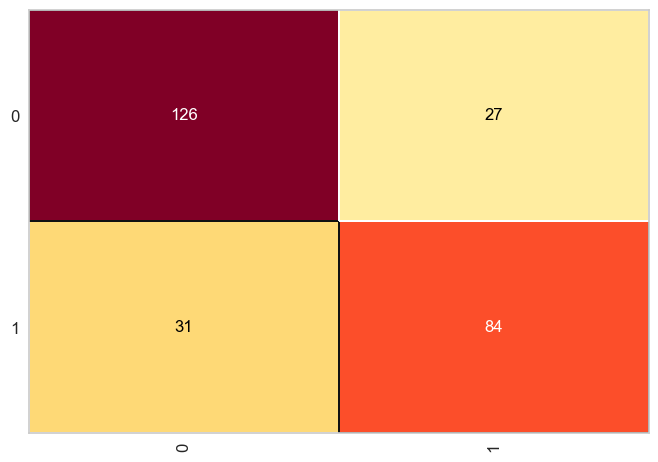

In [30]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [31]:
data_test = data_test.drop(columns=['Survived'], errors='ignore')
data_test = data_test.reindex(columns=X_train.columns, fill_value=0)
y_predict = model.predict(data_test)
data_test.loc[:,'Survived'] = y_predict
results = data_test[['PassengerId', 'Survived']]
results.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [32]:
results.to_csv('results.csv', index=False)